<a href="https://colab.research.google.com/github/shresthabanerjee/dog_vision_project/blob/main/dogvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


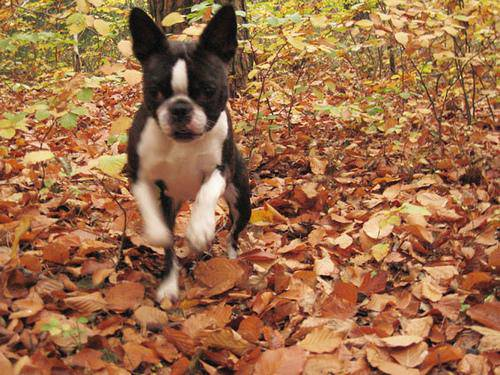

In [2]:
from IPython.display import Image
Image('drive/My Drive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')


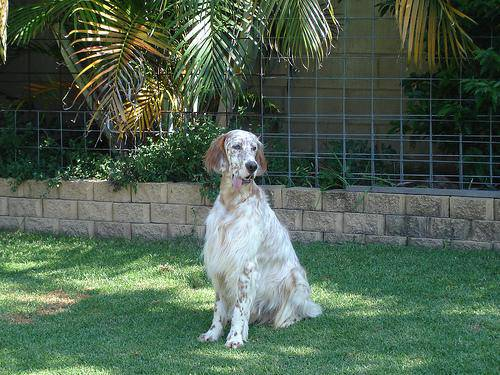

In [ ]:
Image('drive/MyDrive/dog vision/test/0012a730dfa437f5f3613fb75efcd4ce.jpg')

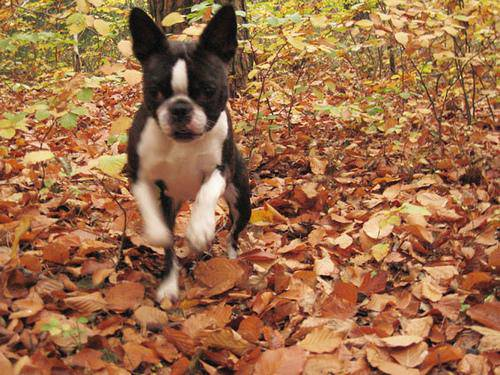

In [ ]:
from IPython.display import Image
Image('drive/My Drive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [3]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [4]:
import tensorflow_hub as hub
hub.__version__

'0.13.0'

In [5]:
if(tf.config.list_physical_devices('GPU')):
  print('available')
else:
 print ('not available')

available


In [6]:
import pandas as pd
labels_csv=pd.read_csv('/content/drive/MyDrive/dog vision/labels.csv')

<Axes: >

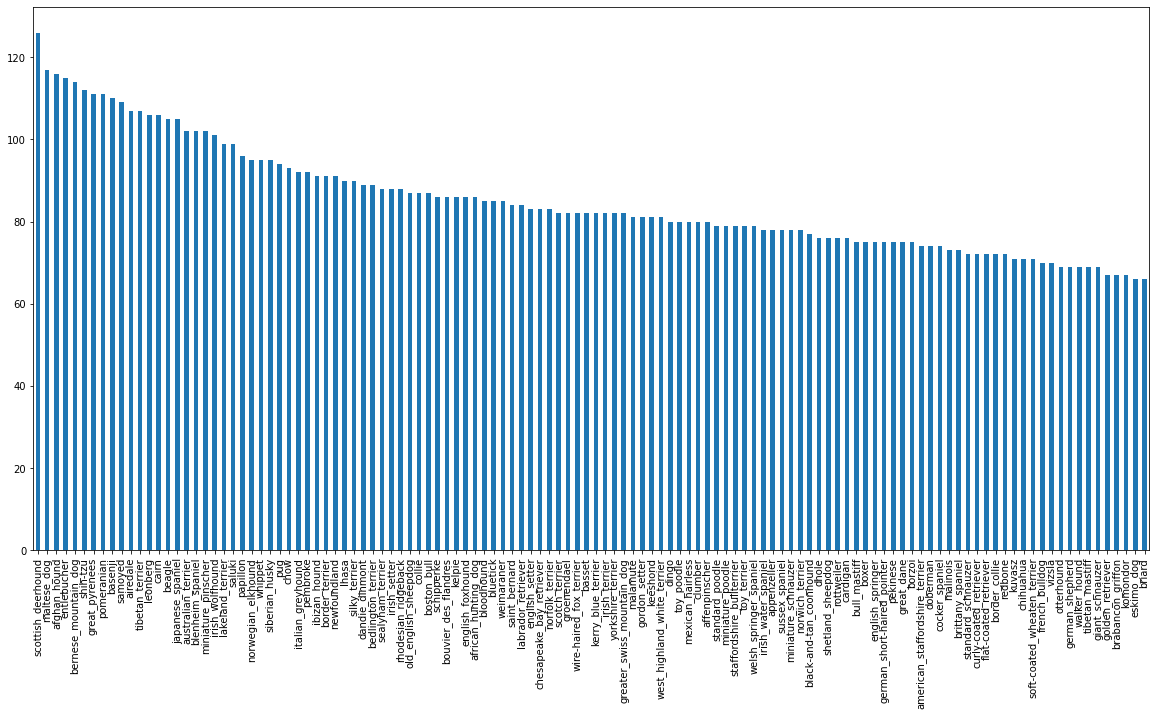

In [7]:
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [8]:
labels_csv.breed.value_counts().mean()

85.18333333333334

In [9]:
labels_csv.breed.value_counts().median()

82.0

In [10]:
filename=['drive/MyDrive/dog vision/train/' + fname + '.jpg' for fname in labels_csv['id']]
len(filename)

10222

In [11]:
filename

['drive/MyDrive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/dog vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/dog vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/dog vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/dog vision/train/006cc3ddb9dc1bd827479569fcdc52d

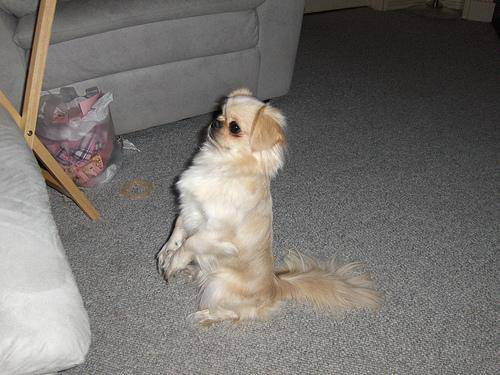

In [12]:
Image(filename[2])

In [13]:
labels_csv['breed'][2]

'pekinese'

In [14]:
import numpy as np
labels=np.array(labels_csv['breed'])

In [15]:
len(labels)

10222

In [16]:
len(np.unique(labels))

120

In [17]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
labels[0]

'boston_bull'

In [19]:
labels[0]==unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
boolean_label=[label==unique_breeds for label in labels ]

In [21]:
len(boolean_label)

10222

In [22]:
#turning boolean list to integer example
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_label[0].astype(int))


boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [23]:
#creating x and y
x=filename
y=boolean_label


In [24]:
#using first 1000 images to create train and valid
from sklearn.model_selection import train_test_split
x_train, x_val,y_train,y_val=train_test_split(x[:1000],y[:1000],test_size=0.2,random_state=42)

In [25]:
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [26]:

#convert image to numpy example
from matplotlib.pyplot import imread
image=imread(filename[42])
image.shape
#shape is a 3D array with lenth,width and 3 as rgb pixel values


(257, 350, 3)

In [27]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [28]:
#max and mix pixel value
image.max(),image.min() 

(255, 0)

In [29]:
#turning images to tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [30]:

#function to preprocess images
IMG_SIZE=224
def process(image_path):
  #read image 
  image=tf.io.read_file(image_path)
  #turn image into numerical tensors with rgb
  image=tf.image.decode_jpeg(image,channels=3)
  #convert the channel values from 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image


 
  



In [31]:
process(filename[2])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3918853 , 0.3918853 , 0.36051273],
        [0.43775532, 0.43775532, 0.40638277],
        [0.44351017, 0.44351017, 0.41213763],
        ...,
        [0.05796662, 0.02239764, 0.01937653],
        [0.05252095, 0.0470589 , 0.04978992],
        [0.04586835, 0.05371149, 0.04978992]],

       [[0.38653433, 0.38261276, 0.3630049 ],
        [0.4161569 , 0.41223532, 0.39262748],
        [0.43315482, 0.42923325, 0.4096254 ],
        ...,
        [0.0909924 , 0.05177672, 0.04754004],
        [0.03035708, 0.02489503, 0.02762605],
        [0.02370449, 0.03154762, 0.02762605]],

       [[0.36859885, 0.36467728, 0.34506944],
        [0.35422263, 0.35030106, 0.33069322],
        [0.39899355, 0.39507198, 0.3754641 ],
        ...,
        [0.2361781 , 0.20233706, 0.19541305],
        [0.04896353, 0.04268564, 0.04582458],
        [0.04459034, 0.04705883, 0.04582458]],

       ...,

       [[0.7591447 , 0.75522316, 0.7356153 ],
        [0.74

In [32]:
image=tf.io.read_file(filename[2])
image
#reading file example

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [33]:
#converting into tensors with values 0-255 with rbg values
image=tf.image.decode_jpeg(image,channels=3)
image

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 97,  97,  89],
        [101, 101,  93],
        [108, 108, 100],
        ...,
        [  9,  11,  10],
        [  9,  11,  10],
        [  9,  11,  10]],

       [[ 99,  99,  91],
        [102, 102,  94],
        [107, 107,  99],
        ...,
        [ 17,  19,  18],
        [ 17,  19,  18],
        [ 17,  19,  18]],

       [[ 98,  97,  92],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  6,   8,   7],
        [  6,   8,   7],
        [  6,   8,   7]],

       ...,

       [[192, 191, 186],
        [193, 192, 187],
        [195, 194, 189],
        ...,
        [118, 117, 113],
        [129, 128, 124],
        [127, 126, 122]],

       [[198, 197, 192],
        [199, 198, 193],
        [200, 199, 194],
        ...,
        [115, 115, 107],
        [107, 106, 101],
        [108, 108, 100]],

       [[199, 198, 193],
        [200, 199, 194],
        [202, 201, 196],
        ...,
        [ 95,  95,  8

In [34]:
#convert tensors from 0-255 to 0-1
image=tf.image.convert_image_dtype(image,tf.float32)
image

<tf.Tensor: shape=(375, 500, 3), dtype=float32, numpy=
array([[[0.3803922 , 0.3803922 , 0.34901962],
        [0.39607847, 0.39607847, 0.3647059 ],
        [0.42352945, 0.42352945, 0.3921569 ],
        ...,
        [0.03529412, 0.04313726, 0.03921569],
        [0.03529412, 0.04313726, 0.03921569],
        [0.03529412, 0.04313726, 0.03921569]],

       [[0.38823533, 0.38823533, 0.35686275],
        [0.40000004, 0.40000004, 0.36862746],
        [0.41960788, 0.41960788, 0.38823533],
        ...,
        [0.06666667, 0.07450981, 0.07058824],
        [0.06666667, 0.07450981, 0.07058824],
        [0.06666667, 0.07450981, 0.07058824]],

       [[0.38431376, 0.3803922 , 0.36078432],
        [0.38823533, 0.38431376, 0.3647059 ],
        [0.40000004, 0.39607847, 0.37647063],
        ...,
        [0.02352941, 0.03137255, 0.02745098],
        [0.02352941, 0.03137255, 0.02745098],
        [0.02352941, 0.03137255, 0.02745098]],

       ...,

       [[0.75294125, 0.7490196 , 0.7294118 ],
        [0.75

In [35]:
#reshape
image=tf.image.resize(image,size=[244,244])
image

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.39017424, 0.39017424, 0.35880166],
        [0.4326851 , 0.4326851 , 0.40131256],
        [0.4456686 , 0.4456686 , 0.41429606],
        ...,
        [0.07297987, 0.0431246 , 0.03690161],
        [0.04821618, 0.04705866, 0.04763742],
        [0.04371585, 0.05155899, 0.04763742]],

       [[0.38793537, 0.38477722, 0.3628791 ],
        [0.41550556, 0.4123474 , 0.39044932],
        [0.43787226, 0.4347141 , 0.41281602],
        ...,
        [0.07326582, 0.0428699 , 0.0364667 ],
        [0.03642736, 0.03526985, 0.0358486 ],
        [0.03192703, 0.03977017, 0.0358486 ]],

       [[0.37023297, 0.3663114 , 0.34670353],
        [0.36133656, 0.357415  , 0.33780715],
        [0.39910078, 0.3951792 , 0.37557137],
        ...,
        [0.1921523 , 0.16200167, 0.15428688],
        [0.04563   , 0.04332854, 0.04447927],
        [0.04189971, 0.04705883, 0.04447927]],

       ...,

       [[0.7543219 , 0.7504003 , 0.7307924 ],
        [0.74

In [36]:

#function to return tuple of (image,label)
def get_tuple(image_path,label):
  image=process(image_path)
  return image,label



In [37]:
get_tuple(x[42],y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [38]:
#turning into batches of size 32
BATCH_SIZE=32
def create_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  #create batch of image and label pairs.shuffle test data but not valid data
  #also accepts test data as input(no labels)
  if test_data:
    print('creating test data batches')
    data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch=data.map(process).batch(BATCH_SIZE)
    return data_batch
  #if valid then dont shuffle and valid set has tuples
  elif valid_data:
    print('creating valid data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_tuple).batch(BATCH_SIZE)
    return data_batch
  else:
    #training data into batches , shuffling and turning tuples into tensors batches
    print('creating training data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch=data.map(get_tuple).batch(BATCH_SIZE)
    return data_batch






In [39]:
#passing training and validation set into batches
train_data=create_batches(x_train,y_train)
val_data=create_batches(x_val,y_val,valid_data=True)



creating training data batches
creating valid data batches


In [40]:
train_data
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [41]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [42]:
#unbatch the data
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[0.07139856, 0.09884954, 0.067477  ],
          [0.09635355, 0.12380453, 0.09243198],
          [0.0652661 , 0.09271709, 0.06134453],
          ...,
          [0.57974803, 0.5290527 , 0.27237514],
          [0.41159055, 0.37444562, 0.09315832],
          [0.5417921 , 0.5128005 , 0.21153991]],
 
         [[0.11064427, 0.13809524, 0.1067227 ],
          [0.09733894, 0.12478992, 0.09341738],
          [0.05167567, 0.07912665, 0.0477541 ],
          ...,
          [0.58411956, 0.5411224 , 0.28187874],
          [0.48028725, 0.447514  , 0.16404086],
          [0.5830934 , 0.55639774, 0.2597291 ]],
 
         [[0.09850441, 0.12595539, 0.09458284],
          [0.11849741, 0.14594838, 0.11457584],
          [0.10716788, 0.13461885, 0.10324631],
          ...,
          [0.5364197 , 0.5011256 , 0.23810042],
          [0.49023685, 0.4613852 , 0.18113327],
          [0.43453878, 0.41390055, 0.12183367]],
 
         ...,
 
         [[0.50603604, 0.38899407, 0.2368931 ],
          [0.49399

In [43]:
import matplotlib.pyplot as plt

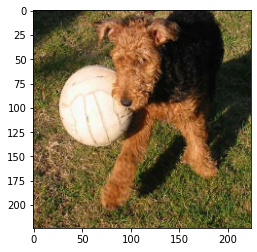

In [44]:
plt.imshow(train_images[0])

In [45]:
#defining input size,output size and model url
INPUT_SIZE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SIZE=len(unique_breeds)
MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [46]:
train_images.shape

(32, 224, 224, 3)

In [47]:
#funtion to build keras model
def create_model(input_shape=INPUT_SIZE,output_shape=OUTPUT_SIZE,model_url=MODEL_URL):
  print('Building a model', MODEL_URL)
  #setup model layers
  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL), #LAYER 1 input layer
                             tf.keras.layers.Dense(units=OUTPUT_SIZE,
                                                   activation ='softmax')]) #layers 2 output layer

#compile model
  model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
#build a model
  model.build(INPUT_SIZE)

  return model


In [48]:
model=create_model()
model.summary()

Building a model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [49]:
#creating callbacks
%load_ext tensorboard

In [50]:
import datetime
#function to build tendorboard callboard
def callback():
  logdir="logs/fit/"+ datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  return tf.keras.callbacks.TensorBoard(logdir)

In [51]:
#stopping training when they stop improving
#prevents overfitting
#function to build early spotting callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)


In [52]:
#training a model(1000 images)
NUM_EPOCHS=100 

In [53]:
#function to train model and return a trained model
def train_model():
  model=create_model()
  tensorboard=callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  return model

  


In [54]:
#fit model
model=train_model()

Building a model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 203s 8s/step - loss: 4.6421 - accuracy: 0.0938 - val_loss: 3.6566 - val_accuracy: 0.2050
Epoch 2/100
25/25 [==============================] - 3s 118ms/step - loss: 1.6463 - accuracy: 0.6725 - val_loss: 2.3468 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 4s 164ms/step - loss: 0.5652 - accuracy: 0.9463 - val_loss: 1.7539 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 3s 133ms/step - loss: 0.2517 - accuracy: 0.9850 - val_loss: 1.5367 - val_accuracy: 0.5850
Epoch 5/100
25/25 [==============================] - 3s 117ms/step - loss: 0.1451 - accuracy: 0.9987 - val_loss: 1.4461 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 3s 121ms/step - loss: 0.0998 - accuracy: 1.0000 - val_loss: 1.4028 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 4

In [55]:
#so we see out model is overfitting bcoz its performing way better in training than in validation i.e training accuracy better than val



In [56]:
#making predictions
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 90ms/step


array([[8.3337125e-04, 1.2507492e-04, 1.5629176e-04, ..., 5.7237095e-05,
        1.6966773e-05, 1.8657814e-03],
       [1.0173973e-03, 1.2284337e-04, 1.1594789e-03, ..., 6.5726793e-04,
        2.8410121e-03, 4.0830905e-04],
       [3.9875049e-06, 2.9920466e-05, 2.1969008e-06, ..., 5.9785366e-06,
        3.2409343e-06, 1.6895359e-05],
       ...,
       [2.5772699e-06, 4.9577200e-05, 5.2547780e-06, ..., 1.2265801e-05,
        4.6789701e-05, 5.5964756e-05],
       [1.3043456e-03, 4.0060515e-04, 7.6828801e-05, ..., 1.8299544e-04,
        1.1061188e-05, 1.6510004e-02],
       [1.2900140e-03, 1.0533849e-05, 4.4684979e-04, ..., 3.4598933e-04,
        1.5079225e-03, 6.1546583e-05]], dtype=float32)

In [57]:
predictions[0]

array([8.33371247e-04, 1.25074919e-04, 1.56291761e-04, 3.38804384e-05,
       1.04137296e-04, 5.31047444e-05, 8.59693717e-03, 2.06383556e-04,
       8.80021107e-05, 7.65326666e-04, 1.77814087e-04, 1.43700687e-04,
       1.35684822e-04, 2.66244242e-05, 1.39801676e-04, 5.03171759e-04,
       1.65507099e-05, 1.80473760e-01, 2.82366327e-05, 3.90698115e-05,
       1.18997836e-04, 6.57469092e-04, 2.20032257e-06, 3.75071802e-04,
       6.65727057e-05, 2.34142717e-04, 2.19395176e-01, 1.19835800e-04,
       2.98557017e-04, 7.04913808e-04, 5.74325131e-05, 1.06883526e-04,
       3.32436874e-04, 1.48003210e-05, 1.77709244e-05, 2.48603728e-02,
       2.87225566e-06, 1.26199026e-04, 2.73776714e-05, 4.37096489e-04,
       9.20228311e-04, 1.02091881e-05, 5.50707337e-05, 1.34746893e-04,
       8.56047263e-05, 1.22616562e-04, 1.34767961e-05, 1.90125647e-04,
       1.89357845e-03, 3.10399228e-05, 1.17984106e-04, 1.39953272e-05,
       1.08743887e-04, 6.70358786e-05, 6.58782374e-05, 1.54827139e-05,
      

In [58]:
predictions[81]

array([7.35283975e-05, 1.79247108e-05, 2.90506128e-02, 3.35030541e-06,
       2.91010756e-02, 5.97472186e-04, 4.04634420e-03, 9.95788444e-03,
       1.20549574e-02, 1.11233348e-04, 1.26744044e-05, 5.03757910e-04,
       1.20315293e-03, 4.74336994e-04, 1.82795440e-04, 5.20993817e-05,
       1.17989584e-05, 1.13050127e-03, 9.13900076e-05, 2.65604607e-03,
       1.49504849e-05, 1.73809804e-05, 1.20230648e-03, 1.22275787e-05,
       1.68108046e-01, 6.58788440e-06, 1.00588659e-04, 4.05243039e-03,
       2.19954606e-02, 7.14389384e-02, 2.95138045e-04, 1.02073175e-03,
       2.46991141e-04, 5.80007385e-04, 7.33377747e-05, 2.98482173e-05,
       9.73611791e-03, 4.15704608e-01, 1.39699015e-03, 6.87568856e-04,
       1.33713556e-03, 5.96009595e-05, 5.99578962e-05, 7.40568386e-04,
       6.84083439e-03, 1.84250559e-04, 1.34306296e-03, 7.07168656e-04,
       7.50368417e-05, 1.41180558e-02, 1.88986069e-05, 1.77741476e-05,
       3.42650642e-03, 3.01826987e-07, 1.06777494e-04, 9.93735716e-03,
      

In [59]:
np.max(predictions[81]),np.argmax(predictions[81]),unique_breeds[np.argmax(predictions[81])]

(0.4157046, 37, 'dingo')

In [60]:
unique_breeds[55]

'ibizan_hound'

In [61]:
#function to visualize predictions
#confidence levels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]




In [62]:
pred_label=get_pred_label(predictions[81])
pred_label

'dingo'

In [65]:
#function to unbatch

def unbatchfy(data):
  images=[]
  labels=[]

  for image,label in data.unbatch().as_numpy_iterator():
     images.append(image)
     labels.append(unique_breeds[np.argmax(label)])
  return images,labels


In [66]:
val_images,val_labels=unbatchfy(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [67]:
#to make visualiation
#function to takes array of pred proba,array of boolean labels and array of images and int
#convert prediction probabilities into labels
#plot lab,probability , boolean labe and target image in single plot
def plot_pred(prediction_probabilities,labels,images,n=1):
  
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  #get pred label
  pred_label=get_pred_label(pred_prob)
  #plot images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label==true_label:
    color="green"
  else:
    color="red"
  #change plot title 
  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)



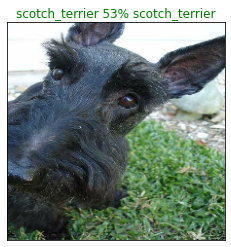

In [68]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          )

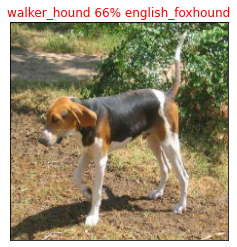

In [69]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=42)

In [70]:
#top 10 predictions
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label=prediction_probabilities[n],labels[n]
  pred_label=get_pred_label(pred_prob)
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation='vertical')
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
  else:
    pass



In [71]:
#top 10 pred
predictions[0][predictions[0].argsort()[-10:][::-1]] , predictions[0].argsort()[-10:][::-1]

(array([0.40114596, 0.21939518, 0.18047376, 0.02486037, 0.02009664,
        0.01840962, 0.01777799, 0.01492806, 0.01203473, 0.00864434],
       dtype=float32),
 array([ 59,  26,  17,  35, 106,  70, 102,  68,  73,  79]))

In [72]:
predictions[0].max() 

0.40114596

In [73]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['irish_wolfhound', 'cairn', 'border_terrier', 'dandie_dinmont',
       'standard_schnauzer', 'lhasa', 'silky_terrier', 'lakeland_terrier',
       'maltese_dog', 'norfolk_terrier'], dtype=object)

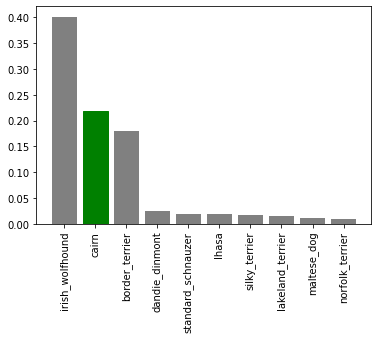

In [74]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=0)


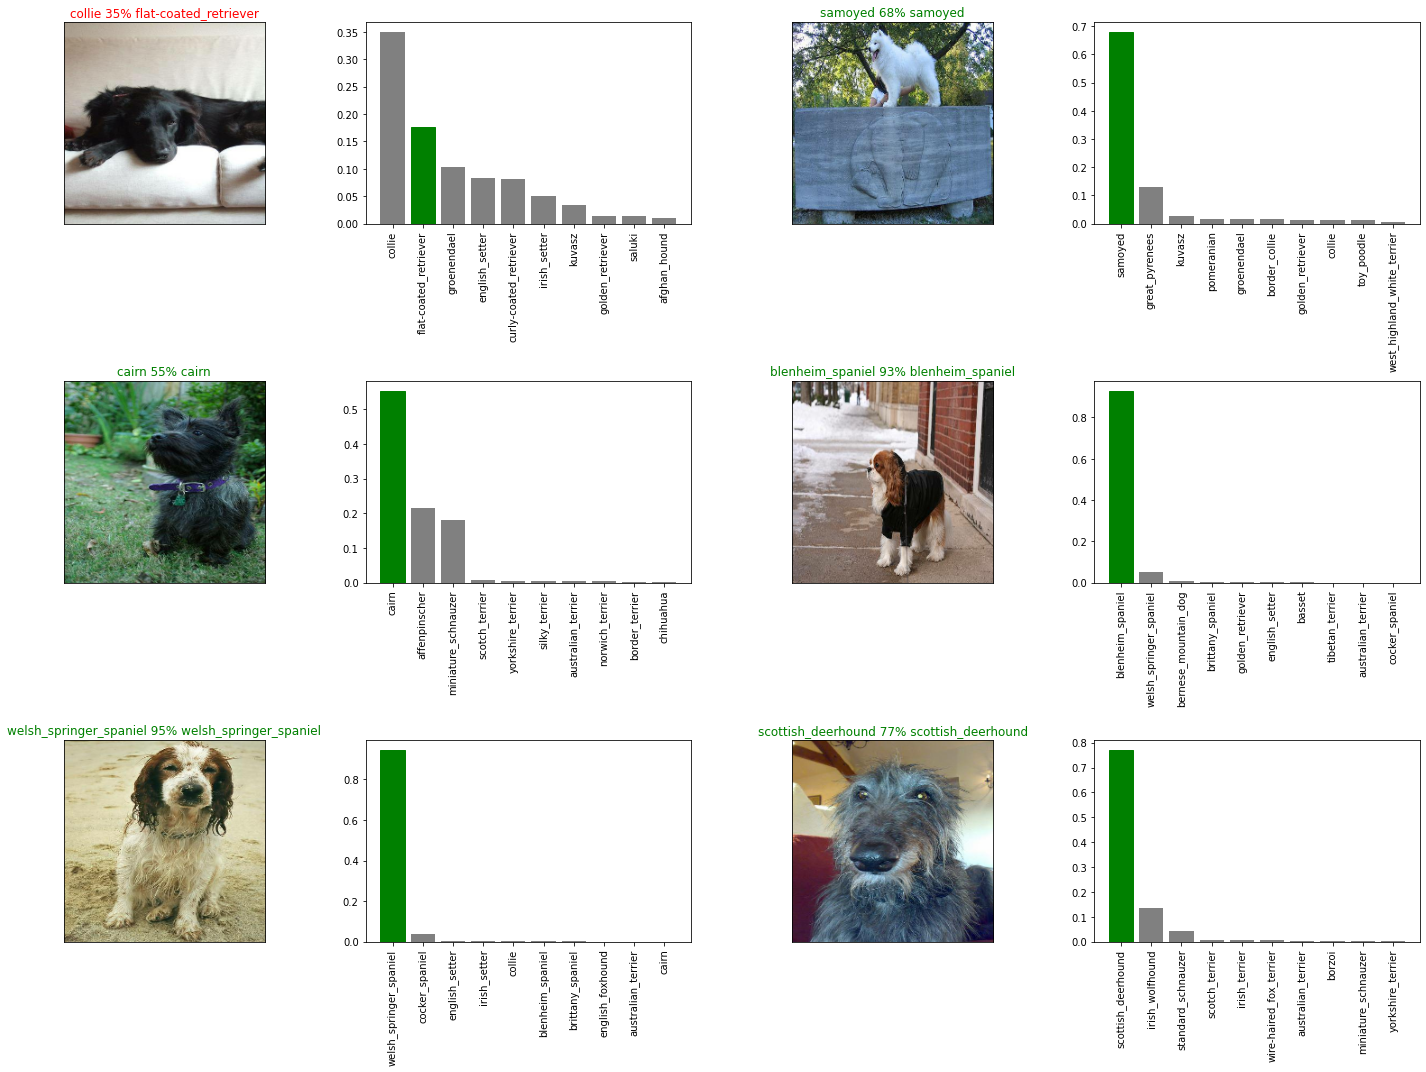

In [75]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


In [76]:
#training full dataset

In [77]:
len(x),len(y)

(10222, 10222)

In [78]:
#create databatch
full_data=create_batches(x,y)
full_data

creating training data batches


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [79]:
#create model for full model
full_model=create_model()
#callbacks
full_model_tensorboard=callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)

Building a model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [80]:
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1955s 6s/step - loss: 1.3578 - accuracy: 0.6705
Epoch 2/100
320/320 [==============================] - 32s 100ms/step - loss: 0.4052 - accuracy: 0.8772
Epoch 3/100
320/320 [==============================] - 32s 100ms/step - loss: 0.2394 - accuracy: 0.9346
Epoch 4/100
320/320 [==============================] - 32s 101ms/step - loss: 0.1561 - accuracy: 0.9617
Epoch 5/100
320/320 [==============================] - 33s 104ms/step - loss: 0.1075 - accuracy: 0.9779
Epoch 6/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0772 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0593 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0453 - accuracy: 0.9948
Epoch 9/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0388 - accuracy: 0.9955
Epoch 10/100
320/320 [==============================] - 32s 99ms/

In [81]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [82]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [83]:
# Save our model trained on 1000 images
import os
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models/20230326-05211679808117-1000-images-Adam.h5...


'drive/My Drive/Data/models/20230326-05211679808117-1000-images-Adam.h5'

In [84]:
# Savefull model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/Data/models/20230326-05221679808120-all-images-Adam.h5...


'drive/My Drive/Data/models/20230326-05221679808120-all-images-Adam.h5'

In [85]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Data/models/20230325-20361679776570-all-images-Adam.h5')

Loading saved model from: drive/My Drive/Data/models/20230325-20361679776570-all-images-Adam.h5


In [86]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/dog vision/my dog photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [87]:
custom_image_paths

['/content/drive/MyDrive/dog vision/my dog photos/dog-photo-2.jpeg',
 '/content/drive/MyDrive/dog vision/my dog photos/dog-photo-1.jpeg',
 '/content/drive/MyDrive/dog vision/my dog photos/dog-photo-3.jpeg']

In [89]:
# Turn custom images into batch datasets 
custom_data = create_batches(custom_image_paths, test_data=True)
custom_data

creating test data batches


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [90]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 3s 3s/step


In [91]:
custom_preds.shape

(3, 120)

In [92]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['lakeland_terrier', 'golden_retriever', 'labrador_retriever']

In [93]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

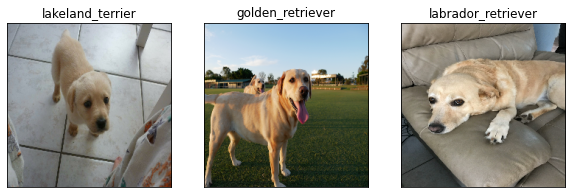

In [94]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)